In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Beispiel-Daten generieren
np.random.seed(42)
X = np.random.rand(100, 5)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(100) * 0.5  # Lineare Beziehung mit Rauschen

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Ohne Regularisierung

Lineare Regression - Mean Squared Error: 0.2439845548406657
Lineare Regression - Koeffizienten: [ 2.82647934  1.88303834  0.32395165  0.0727923  -0.22282008]


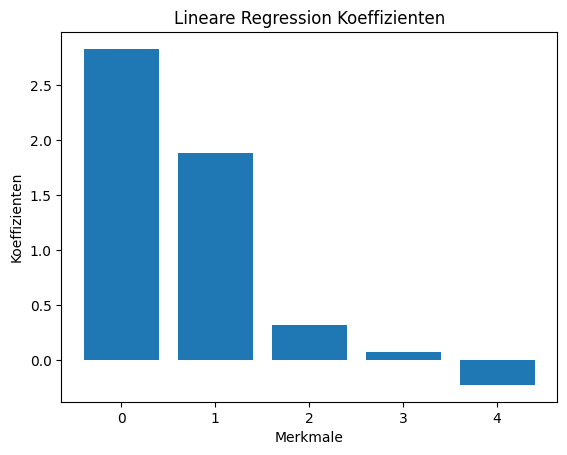

In [2]:
# Lineare Regression (keine Regularisierung)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = lin_reg.predict(X_test)

# Modellbewertung
print("Lineare Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Lineare Regression - Koeffizienten:", lin_reg.coef_)

# Visualisierung der Koeffizienten
plt.bar(range(X.shape[1]), lin_reg.coef_)
plt.xlabel("Merkmale")
plt.ylabel("Koeffizienten")
plt.title("Lineare Regression Koeffizienten")
plt.show()

### Lasso

Lasso - Mean Squared Error: 0.3192955664815028
Lasso - Koeffizienten: [ 1.56942038  0.6766994   0.          0.         -0.        ]


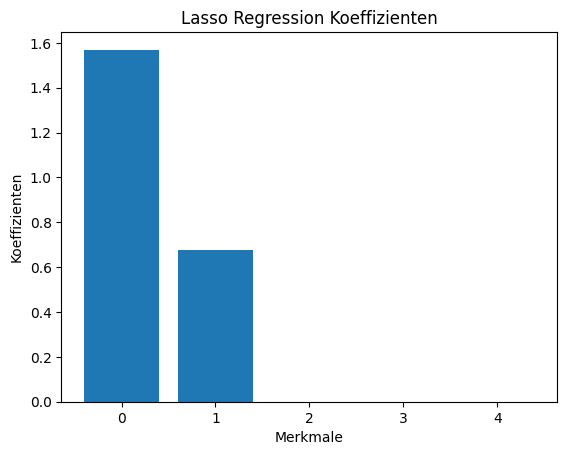

In [3]:
# Lasso-Regression mit Alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = lasso.predict(X_test)

# Modellbewertung
print("Lasso - Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Lasso - Koeffizienten:", lasso.coef_)

# Visualisierung der Koeffizienten
plt.bar(range(X.shape[1]), lasso.coef_)
plt.xlabel("Merkmale")
plt.ylabel("Koeffizienten")
plt.title("Lasso Regression Koeffizienten")
plt.show()


### Ridge

Ridge - Mean Squared Error: 0.24092899862895578
Ridge - Koeffizienten: [ 2.44613543  1.62262628  0.23529669  0.07927352 -0.23915434]


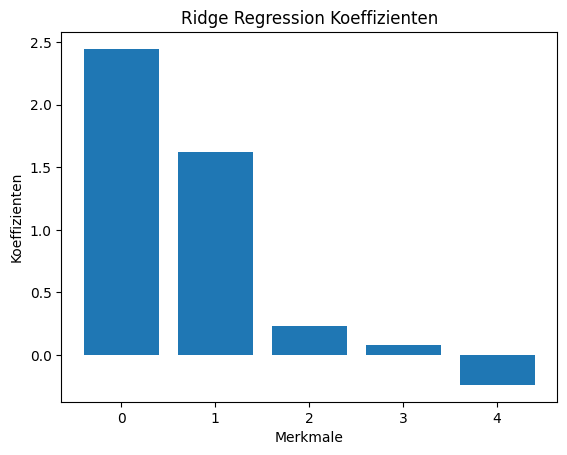

In [4]:
from sklearn.linear_model import Ridge

# Ridge-Regression mit Alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Vorhersagen treffen
y_pred_ridge = ridge.predict(X_test)

# Modellbewertung
print("Ridge - Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge - Koeffizienten:", ridge.coef_)

# Visualisierung der Koeffizienten
plt.bar(range(X.shape[1]), ridge.coef_)
plt.xlabel("Merkmale")
plt.ylabel("Koeffizienten")
plt.title("Ridge Regression Koeffizienten")
plt.show()

### Vergleich der Koeffizienten

In [5]:
print("Lasso-Koeffizienten:\t\t", lasso.coef_)
print("Ridge-Koeffizienten:\t\t", ridge.coef_)
print("Lineare Regression ohne Reg.:\t", lin_reg.coef_)

Lasso-Koeffizienten:		 [ 1.56942038  0.6766994   0.          0.         -0.        ]
Ridge-Koeffizienten:		 [ 2.44613543  1.62262628  0.23529669  0.07927352 -0.23915434]
Lineare Regression ohne Reg.:	 [ 2.82647934  1.88303834  0.32395165  0.0727923  -0.22282008]


### Regularisierung mit Cross Validation

Alpha: 0.01, Mean MSE: 120.6193
Alpha: 0.1, Mean MSE: 120.7518
Alpha: 1, Mean MSE: 128.3894
Alpha: 10, Mean MSE: 663.2234
Alpha: 100, Mean MSE: 11543.5099
Optimaler Alpha-Wert: 0.01


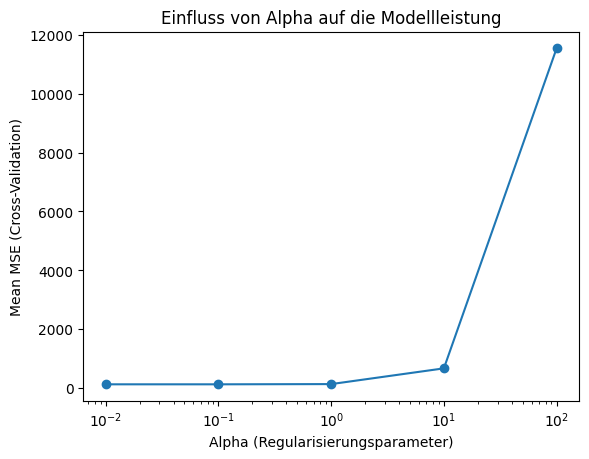

In [6]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression

# Daten erstellen
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Cross-Validation mit verschiedenen Alpha-Werten
alphas = [0.01, 0.1, 1, 10, 100]
cv_scores = []

for alpha in alphas:
	ridge = Ridge(alpha=alpha)

	# 5-Fold Cross-Validation
	scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
	mean_score = -scores.mean() # Negativer MSE wird positiv gemacht
	# Die Funktion cross_val_score von Scikit-learn arbeitet mit Scoring-Metriken, bei denen höhere Werte besser sind.
	# Da der Mean Squared Error (MSE) eine Verlustfunktion ist (bei der kleinere Werte besser sind), kehrt cross_val_score das Vorzeichen des MSE um, um ihn in dieses Schema zu integrieren.
	cv_scores.append(mean_score)
	print(f"Alpha: {alpha}, Mean MSE: {mean_score:.4f}")

# Optimalen Alpha-Wert auswählen

optimal_alpha = alphas[np.argmin(cv_scores)]
print(f"Optimaler Alpha-Wert: {optimal_alpha}")

plt.plot(alphas, cv_scores, marker='o')
plt.xscale('log') # Log-Skala für bessere Darstellung
plt.xlabel('Alpha (Regularisierungsparameter)')
plt.ylabel('Mean MSE (Cross-Validation)')
plt.title('Einfluss von Alpha auf die Modellleistung')
plt.show()